## E-Commerce website A/B Analysis

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

The purpose of this analysis is to determine whether or not an E-commerce website should implement a new page, keep their exisiting page or run the experiment longer in order to make a decision. For the purposes of this analysis, we will use a A/B test. This type of testing is a controlled experiment with two variants. In our case, this is the 'new' page and the 'old' page.

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
# Read the ab_data.csv file and set it to df
df = pd.read_csv('ab_data.csv')
# Show the first 5 rows of df
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the below cell to find the number of rows in the dataset.

In [3]:
# Print out the shape of the dataframe to show the number of rows in a (x, y) format
print("The number of rows in the dataset is " + str(df.shape[0]))

The number of rows in the dataset is 294478


c. The number of unique users in the dataset.

In [4]:
# Get the unique number of users in the dataset
unique_users = len(df['user_id'].unique().tolist())
# Print out the unique number of users
print('There are ' + str(unique_users) + ' unique users in the dataset.')

There are 290584 unique users in the dataset.


d. The proportion of users converted.

In [5]:
# Compute the proportion of users converted
users_converted = df.query('converted == 1').count()[0] / (df.query('converted == 1').count()[0] + df.query('converted == 0').count()[0])

# Convert to a percentage
users_converted_percentage = users_converted * 100

# Print the proportion of users convereted
print('The proporation of converted users are ' + str(users_converted_percentage) + '%')

The proporation of converted users are 11.9659193556%


e. The number of times the `new_page` and `treatment` don't line up.

In [6]:
# Get the rows where treatment group lands on old page
wrong_treatment1 = df.query("group == 'treatment' and landing_page == 'old_page'")

# Get the rows where control group lands on new page
wrong_treatment2 = df.query("group == 'control' and landing_page == 'new_page'")

# Print the number of times that the new_page and treatment don't line up
print("The number of times that new_page and treatment don't line up: " + str(len(wrong_treatment1)) + str(len(wrong_treatment2)))

The number of times that new_page and treatment don't line up: 19651928


f. Do any of the rows have missing values?

In [7]:
# Use .info on df to see if we are missing any values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
user_id         294478 non-null int64
timestamp       294478 non-null object
group           294478 non-null object
landing_page    294478 non-null object
converted       294478 non-null int64
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


No values are missing

`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [8]:
# Drop the rows for mismatched treatment and control groups
df.drop(df.query("group == 'treatment' and landing_page == 'old_page'").index, inplace=True)
df.drop(df.query("group == 'control' and landing_page == 'new_page'").index, inplace=True)

# set the new dataframe to df2
df2 = df

# print out the info for df2
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290585 entries, 0 to 294477
Data columns (total 5 columns):
user_id         290585 non-null int64
timestamp       290585 non-null object
group           290585 non-null object
landing_page    290585 non-null object
converted       290585 non-null int64
dtypes: int64(2), object(3)
memory usage: 13.3+ MB


In [9]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [10]:
# Return the unique user_ids in df2
df2_unique_users = len(df2['user_id'].unique().tolist())
df2_unique_users

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [11]:
# Return the duplicated user_id
duplicated_user = df2[df2.duplicated(['user_id'], keep=False)]['user_id']
duplicated_user

1899    773192
2893    773192
Name: user_id, dtype: int64

c. What is the row information for the repeat **user_id**? 

In [12]:
# Show the row details for the duplicated user_id
duplicated_user_df = df2[df2.duplicated(['user_id'], keep=False)]
duplicated_user_df

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [13]:
# Remove the oldest row by timestamp and keep the latest one
time_stamp = "2017-01-09 05:37:58.781806"
df2 = df2[df2.timestamp != time_stamp]

# see the info on our new df2
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290584 entries, 0 to 294477
Data columns (total 5 columns):
user_id         290584 non-null int64
timestamp       290584 non-null object
group           290584 non-null object
landing_page    290584 non-null object
converted       290584 non-null int64
dtypes: int64(2), object(3)
memory usage: 13.3+ MB


`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [14]:
# Calculate mean to get probability of a user converting
df2['converted'].mean()

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [15]:
group_df = df.groupby('group')
group_df.describe()

converted                                                user_id  \
              count      mean       std  min  25%  50%  75%  max     count   
group                                                                        
control    145274.0  0.120386  0.325414  0.0  0.0  0.0  0.0  1.0  145274.0   
treatment  145311.0  0.118807  0.323563  0.0  0.0  0.0  0.0  1.0  145311.0   

                                                                      \
                    mean           std       min       25%       50%   
group                                                                  
control    788164.072594  91287.914601  630002.0  709279.5  788128.5   
treatment  787845.618446  91161.258854  630000.0  708746.5  787874.0   

                                
                 75%       max  
group                           
control    867208.25  945998.0  
treatment  866718.50  945999.0

Judging from our mean for the control group, we can see that the probability of an individual in the control group converting is 0.120386 or 12%

c. Given that an individual was in the `treatment` group, what is the probability they converted?

Judging from our mean for the treatment group, we can see that the probability of an individual in the treatment group converting is 0.118807 or 11%

d. What is the probability that an individual received the new page?

In [16]:
# Get the users that were placed in the treatment group
new_page_user = len(df2.query("group == 'treatment'"))

# Get the total number of users
total_users = df2.shape[0]

# Get the probability that a user recieved a new page
print("The probability that an individual received the new page: " + str(new_page_user/total_users))
# As a percentage
print("As a percentage: " + str((new_page_user/total_users)*100) + "%")

The probability that an individual received the new page: 0.5000619442226688
As a percentage: 50.00619442226688%


e. Consider your results from a. through d. above, and explain below whether you think there is sufficient evidence to say that the new treatment page leads to more conversions.

* If an individual was placed within the treatment group, the probability they converted is 0.118807.
* If an individual was placed within the control group, the probability they converted is 0.120386.
* It looks like the old page does better by an extremely small margin.
* Based on these results, we cannot state that one page leads to more conversions.

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

Hypothesis

* $H_{0}$ : $p_{new}$ - $p_{old} \leq 0$
* $H_{1}$ : $p_{new}$ - $p_{old}$ > 0

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **convert rate** for $p_{new}$ under the null? 

In [17]:
# Get the convert rate for the new page
p_new = df2[df2['landing_page']=='new_page']['converted'].mean()
print("The probability of conversion for the new page is: " + str(p_new))

The probability of conversion for the new page is: 0.11880806551510564


b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [18]:
# Get the convert rate for the old page
p_old = df2[df2['landing_page']=='old_page']['converted'].mean()
print("The probability of conversion for the old page is: " + str(p_old))

The probability of conversion for the old page is: 0.1203863045004612


In [19]:
# Get the mean of these probabilities
p_mean = np.mean([p_new,p_old])

print("Probability of conversion under the null hypothesis: " + str(p_mean))

Probability of conversion under the null hypothesis: 0.119597185008


In [20]:
# Get the differences in probability of conversion for new and old page
difference_p = p_new - p_old
print("The difference in probability of conversion for the new page and the old page is: " + str(difference_p))

The difference in probability of conversion for the new page and the old page is: -0.0015782389853555567


c. What is $n_{new}$?

In [21]:
# Get the length of the new page group
n_new_page = len(df2.query("group == 'treatment'"))
print(n_new_page)

145310


d. What is $n_{old}$?

In [22]:
# Get the length of the old page group
n_old_page = len(df2.query("group == 'control'"))
print(n_old_page)

145274


e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [23]:
new_page_converted = np.random.choice([1,0], size=n_new_page, p=[p_mean, (1-p_mean)])
print(new_page_converted.mean())

0.118140527149


f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [24]:
old_page_converted = np.random.choice([1, 0], size=n_old_page, p=[p_mean, (1-p_mean)])
print(old_page_converted.mean())

0.117825626058


g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [25]:
# Calculate the difference in p under the null hypothesis
new_page_converted.mean() - old_page_converted.mean()

0.00031490109050925918

h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in a numpy array called **p_diffs**.

In [26]:
# Initialize the empty numpy array
p_diffs = []

# Simulate the values 10,000 times
for i in range(10000):
    new_page_converted = np.random.choice([1,0], size=n_new_page, p=[p_mean, (1-p_mean)])
    old_page_converted = np.random.choice([1, 0], size=n_old_page, p=[p_mean, (1-p_mean)])
    p_diff = new_page_converted.mean() - old_page_converted.mean()
    p_diffs.append(p_diff)

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

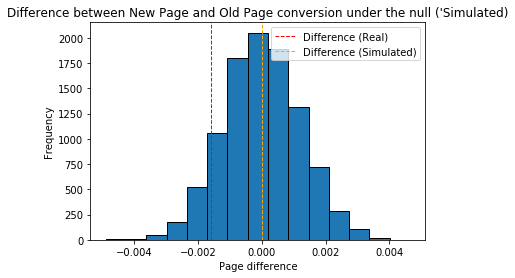

In [27]:
# Plot our histogram for p_diffs
plt.hist(p_diffs, bins=15, histtype='bar', ec='black')

# Set the title
plt.title("Difference between New Page and Old Page conversion under the null ('Simulated)")

# Label the X-Axis
plt.xlabel('Page difference')

# Label the Y-Axis
plt.ylabel('Frequency')

# Show the real difference in the plot
plt.axvline(x=(p_new-p_old), color='red', linestyle='dashed', linewidth=1, label='Difference (Real)')

# Show the simulated difference in the plot
plt.axvline(x=(np.array(p_diffs).mean()), color='orange', linestyle='dashed', linewidth=1, label='Difference (Simulated)')

# Show the legend
plt.legend()

# Show the Plot
plt.show()

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [28]:
p_diff = p_new - p_old

In [29]:
# Get the proportion of p_diffs greater than the actual difference
greater_than_diff = [i for i in p_diffs if i > p_diff]

In [30]:
# Calculate the values
print(p_diff)
p_greater_than_diff = len(greater_than_diff)/len(p_diffs)

# Print the value
print(p_greater_than_diff)

# Print the value as a percentage
print(p_greater_than_diff * 100)

-0.0015782389853555567
0.9073
90.73


k. In words, explain what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

We have just calculated that 90% of the population in the simulated sample lies above the real difference between means which suggest that the new page may be worse than the old page in terms of conversion.

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [31]:
import statsmodels.api as sm

convert_old = len(df2[(df2['landing_page'] == 'old_page') & (df2['converted']==1)])
convert_new = len(df2[(df2['landing_page'] == 'new_page') & (df2['converted']==1)])
n_old = n_old_page
n_new = n_new_page

print('Number of conversion for old pages: ' + str(convert_old))
print('Number of conversion for new pages: ' + str(convert_new))
print('Number of users for old pages: ' + str(n_old))
print('Number of users for new pages: ' + str(n_new))

C:\Users\Will\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


Number of conversion for old pages: 17489
Number of conversion for new pages: 17264
Number of users for old pages: 145274
Number of users for new pages: 145310


m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [45]:
# Find the z-score and the p-value
z_score, p_value = sm.stats.proportions_ztest(count=[convert_new, convert_old], nobs=[n_new,n_old], alternative='larger')

# Print out the scores
print('The z_score is: ' + str(z_score))
print('The p_value is: ' + str(p_value))

The z_score is: -1.31092419842
The p_value is: 0.905058312759


n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

The p-value is 90% which means that this is not enough evidence to reject the null hypothesis and therefore we fail to reject the null.

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

In this case, we will use logistic regression.

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [33]:
# Create a new dataframe for our regression work
df3 = df2

In [34]:
# Creating a new intercept column
df3['intercept'] = pd.Series(np.zeros(len(df3)), index=df3.index)

# Creating a new ab_page column
df3['ab_page'] = pd.Series(np.zeros(len(df3)), index=df3.index)

C:\Users\Will\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Will\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [35]:
# Find the indexes that need to be changed for the treatment group
change_index = df3[df3['group'] == 'treatment'].index

# Change the values
df3.set_value(index=change_index, col='ab_page', value=1)
df3.set_value(index=df3.index, col='intercept', value=1)

# Change the datatype
df3[['intercept', 'ab_page']] == df3[['intercept', 'ab_page']].astype(int)

# Move converted to RHS
df3 = df3[['user_id', 'timestamp', 'group', 'landing_page', 'ab_page', 'intercept', 'converted']]

C:\Users\Will\Anaconda3\lib\site-packages\pandas\core\indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [36]:
# Show the head of the dataset
df3[df3['group'] == 'treatment'].head()

,user_id,timestamp,group,landing_page,ab_page,intercept,converted
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,1.0,1.0,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,1.0,1.0,0
6,679687,2017-01-19 03:26:46.940749,treatment,new_page,1.0,1.0,1
8,817355,2017-01-04 17:58:08.979471,treatment,new_page,1.0,1.0,1
9,839785,2017-01-15 18:11:06.610965,treatment,new_page,1.0,1.0,1


c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [37]:
# Create the logistic regression model
log_reg = sm.Logit(df3['converted'], df3[['ab_page', 'intercept']])

# Calculate our results
result = log_reg.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [38]:
# Get the summary for our model
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Sat, 28 Apr 2018   Pseudo R-squ.:               8.077e-06
Time:                        19:49:07   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
==============================================================================
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

The p-value for ab_page is 19% which means our results have a 19% probability of being completely random and not due to anything in our experiment. Therefore we reject the null hypothesis.

This is drastically different to the p-value that we calculated in Part II, which was 90%. 

This is due to the fact that in Part II, our hypothesis was a one-tailed test as our test was concerned with which page had a higher conversion rate. However, our test in this part isn't concerned with with page had a negative or positive change, rather our regression test is concerned about whether the condition had any affect at all on conversion.

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

One disadvantage of adding additional terms into our regression model is that it will have an effect on the r-squared value. Additional features may weaken the strength of the fit and therefore lower this value.

Additional features that are relevant to the model may strengthen this value. Certain features such as 'time to complete process' (the ease of use of features within the page) may determine whether or not a user likes that page or not and may be beneficial to our model.

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [39]:
countries_df = pd.read_csv('./countries.csv')
df_new = countries_df.set_index('user_id').join(df2.set_index('user_id'), how='inner')
df_new.head()

,country,timestamp,group,landing_page,converted,intercept,ab_page
user_id,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1.0,0.0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1.0,1.0
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1.0,1.0
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1.0,0.0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1.0,1.0


In [40]:
### Create the necessary dummy variables
dummy_df = pd.get_dummies(data=countries_df, columns=['country'])

# Join dummy variable to our dataset df4
df4 = dummy_df.merge(df3, on='user_id')

# Sort the columns out
df4 = df4[['user_id', 'timestamp', 'group', 'landing_page', 'ab_page', 'country_CA', 'country_UK', 'country_US', 'intercept', 'converted']]

# Use encoding
df4[['ab_page', 'country_CA', 'country_UK', 'country_US', 'intercept', 'converted']] = df4[['ab_page', 'country_CA', 'country_UK', 'country_US', 'intercept', 'converted']].astype(int)

# Show the first 5 rows of our new dataset
df4.head()

,user_id,timestamp,group,landing_page,ab_page,country_CA,country_UK,country_US,intercept,converted
0,834778,2017-01-14 23:08:43.304998,control,old_page,0,0,1,0,1,0
1,928468,2017-01-23 14:44:16.387854,treatment,new_page,1,0,0,1,1,0
2,822059,2017-01-16 14:04:14.719771,treatment,new_page,1,0,1,0,1,1
3,711597,2017-01-22 03:14:24.763511,control,old_page,0,0,1,0,1,0
4,710616,2017-01-16 13:14:44.000513,treatment,new_page,1,0,1,0,1,0


In [41]:
# Perform regression on countries
countries_log_reg = sm.Logit(df4['converted'], df4[['country_UK', 'country_US', 'intercept']])

# Fit our regression model
country_result = countries_log_reg.fit()

Optimization terminated successfully.
         Current function value: 0.366116
         Iterations 6


In [42]:
# Show our results
country_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290581
Method:                           MLE   Df Model:                            2
Date:                Sat, 28 Apr 2018   Pseudo R-squ.:               1.521e-05
Time:                        19:49:10   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1984
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
country_UK     0.0507      0.028      1.786      0.074      -0.005       0.106
country_US     0.0408      0.027      1.518      0.129      -0.012       0.093
intercept     -2.0375      0.026    -78.364      0.000      -2.088      -1.987
==============================================================================
"""

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [43]:
# Create regression model to look at interaction between page and country
page_interaction_log = sm.Logit(df4['converted'], df4[['ab_page', 'country_UK', 'country_US', 'intercept']])

# Fit our regression model
page_interaction_result = page_interaction_log.fit()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


In [44]:
# Show our results
page_interaction_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            3
Date:                Sat, 28 Apr 2018   Pseudo R-squ.:               2.323e-05
Time:                        19:49:13   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1760
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ab_page       -0.0149      0.011     -1.307      0.191      -0.037       0.007
country_UK     0.0506      0.028      1.784      0.074      -0.005       0.106
country_US     0.0408      0.027      1.516      0.130      -0.012       0.093
intercept     -2.0300      0.027    -76.249      0.000      -2.082      -1.978
==============================================================================
"""

<a id='conclusions'></a>
## Conclusions

There is not enough evidence to reject our null hypothesis. From the histogram that we generated from our analysis, the new page does worse than the old page.

We also found out that countries had no effect on our model, as conversion rates are roughly the same between the UK and the US. Based on our research question, I would recommend that further experiments with additional features are conducted before any changes are made to the E-commerce website.